https://www.file-recovery.com/jpg-signature-format.htm
    
    http://dicom.nema.org/medical/Dicom/2017c/output/chtml/part05/sect_A.4.html

In [9]:
from pydicom import dcmread
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import numpy as np

In [3]:
folder = Path('/home/anvar/work/data/for_jpeg')
uid = '1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77'

In [84]:
dcm_rgb = dcmread(folder / uid / 'covid' / '1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62.dcm')

In [85]:
dcmwrite('orig_dcm.dcm', dcm_rgb)

In [6]:
from simplejpeg import is_jpeg, decode_jpeg, decode_jpeg_header, encode_jpeg

In [10]:
np.allclose(dcm_rgb.pixel_array, decode_jpeg(encode_jpeg(dcm_rgb.pixel_array)))

False

In [113]:
len(encode_jpeg(dcm_rgb.pixel_array, quality=90))

90827

In [12]:
from turbojpeg import TurboJPEG, TJPF_GRAY, TJSAMP_GRAY, TJFLAG_PROGRESSIVE

In [13]:
jpeg = TurboJPEG()

In [26]:
len(jpeg.encode(dcm_rgb.pixel_array, quality=90))

87670

In [17]:
len(dcm_rgb.PixelData)

786432

In [18]:
np.allclose(dcm_rgb.pixel_array, jpeg.decode(jpeg.encode(dcm_rgb.pixel_array, quality=100)))

False

In [19]:
image_decoded = jpeg.decode(jpeg.encode(dcm_rgb.pixel_array, quality=100))

In [87]:
from cv2 import imwrite

In [ ]:
imwrite()

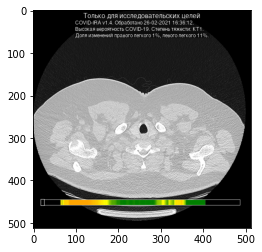

In [20]:
plt.imshow(image_decoded)

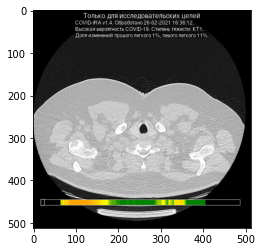

In [86]:
plt.imshow(decode_jpeg(encode_jpeg(dcm_rgb.pixel_array)))

# Convert dicoms

Use gdcmconv to perform lossy jpeg conversion

In [ ]:
!gdcmconv -J --lossy -q 90 -i /home/anvar/work/data/for_jpeg/1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77/covi


In [ ]:
from pydicom import dcmread

import matplotlib.pyplot as plt

%matplotlib inline

from pathlib import Path

import numpy as np
from simplejpeg import is_jpeg, decode_jpeg, decode_jpeg_header, encode_jpeg
from turbojpeg import TurboJPEG, TJPF_GRAY, TJSAMP_GRAY, TJFLAG_PROGRESSIVE

from cv2 import imwrite


In [ ]:


folder = Path('/home/anvar/work/data/for_jpeg')

uid = '1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77'

dcm_rgb = dcmread(folder / uid / 'covid' / '1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62.dcm')

dcmwrite('orig_dcm.dcm', dcm_rgb)


In [ ]:
np.allclose(dcm_rgb.pixel_array, decode_jpeg(encode_jpeg(dcm_rgb.pixel_array)))


In [ ]:



len(encode_jpeg(dcm_rgb.pixel_array, quality=90))


In [ ]:


jpeg = TurboJPEG()

In [ ]:
len(jpeg.encode(dcm_rgb.pixel_array, quality=90))


In [ ]:
len(dcm_rgb.PixelData)


In [ ]:
np.allclose(dcm_rgb.pixel_array, jpeg.decode(jpeg.encode(dcm_rgb.pixel_array, quality=100)))


In [ ]:
image_decoded = jpeg.decode(jpeg.encode(dcm_rgb.pixel_array, quality=100))


In [ ]:
plt.imshow(image_decoded)
plt.imshow(decode_jpeg(encode_jpeg(dcm_rgb.pixel_array)))


In [ ]:

!gdcmconv -J --lossy -q 90 -i /home/anvar/work/data/for_jpeg/1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77/covid/1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62.dcm -o /home/anvar/work/repos/orthanc_api/gdcm_lossy.dcm


In [99]:
img_rgb_lossy = dcmread('/home/anvar/work/data/for_jpeg/1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77/covid/1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62_lossy.dcm')

In [100]:
img_rgb_lossy.PhotometricInterpretation

'RGB'

In [25]:
len(img_rgb_lossy.PixelData)

86754

In [48]:
img_rgb_lossy.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1143.9872100504363308511163387960299132440
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.5
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.5'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [35]:
dcm_rgb.file_meta

(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian

In [47]:
for tag in img_rgb_lossy.dir():
    try:
        jpg = img_rgb_lossy[tag]
        orig = dcm_rgb[tag]        
        if jpg != orig:
            print(jpg)
            print(orig)
            print('===')
    except KeyError:
        print(tag)


DerivationCodeSequence
DerivationDescription
(0008, 0008) Image Type                          CS: ['DERIVED ', 'PRIMARY', 'AXIAL']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
===
LossyImageCompression
LossyImageCompressionRatio
(7fe0, 0010) Pixel Data                          OB: Array of 86754 elements
(7fe0, 0010) Pixel Data                          OW: Array of 786432 elements
===
(0008, 1140) Referenced Image Sequence           SQ: <Sequence, length 1>
(0008, 1140) Referenced Image Sequence           SQ: <Sequence, length 1>
===
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1143.9872100504363308511163387960299132440
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62
===
SourceImageSequence


### New tags

- DerivationCodeSequence
- DerivationDescription
- LossyImageCompressionRatio
- LossyImageCompression
- SourceImageSequence

### Changed tags

- (0008, 0008) Image Type                          CS: ['DERIVED ', 'PRIMARY', 'AXIAL']
- (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']

---

- (0008, 1140) Referenced Image Sequence           SQ: <Sequence, length 1>
- (0008, 1140) Referenced Image Sequence           SQ: <Sequence, length 1>

---

- (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1143.9872100504363308511163387960299132440
- (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62

---

- (7fe0, 0010) Pixel Data                          OB: Array of 86754 elements
- (7fe0, 0010) Pixel Data                          OW: Array of 786432 elements


### Change file_meta!

In [50]:
for elem in img_rgb_lossy['DerivationCodeSequence']:
    print(elem)

(0008, 0100) Code Value                          SH: '113040'
(0008, 0102) Coding Scheme Designator            SH: 'DCM'
(0008, 0104) Code Meaning                        LO: 'Lossy Compression'


In [51]:
img_rgb_lossy['DerivationDescription']

(0008, 2111) Derivation Description              ST: 'lossy conversion'

In [52]:
img_rgb_lossy['LossyImageCompressionRatio']

(0028, 2112) Lossy Image Compression Ratio       DS: "9.0667527496599"

In [57]:
len(dcm_rgb.PixelData) / len(img_rgb_lossy.PixelData)

9.065080572653711

In [53]:
img_rgb_lossy['LossyImageCompression']

(0028, 2110) Lossy Image Compression             CS: '01'

In [55]:
for elem in img_rgb_lossy['SourceImageSequence']:
    print(elem)

(0008, 1150) Referenced SOP Class UID            UI: Secondary Capture Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62
(0040, a170)  Purpose of Reference Code Sequence  1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '121320'
   (0008, 0102) Coding Scheme Designator            SH: 'DCM'
   (0008, 0104) Code Meaning                        LO: 'Uncompressed predecessor'
   ---------


In [59]:
img_rgb_lossy.PixelData

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xd2R\x01\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18

 JPEG must start with \xff\xd8\xff

In [78]:
from pydicom.encaps import encapsulate

In [91]:
img_rgb_lossy.PixelData = encapsulate([jpeg.encode(dcm_rgb.pixel_array, quality=100)])

In [92]:
from pydicom import dcmwrite

In [93]:
dcmwrite('test_dcm_lossy_manual.dcm',img_rgb_lossy, write_like_original=False)

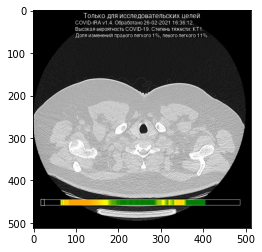

In [69]:
plt.imshow(decode_jpeg(img_rgb_lossy.PixelData[16:]))

In [66]:
img_rgb_lossy.PixelData[16:]

b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x8

In [60]:
dcm_rgb_jpeg = dcmread(folder / '1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77' / '1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62_jpeg.dcm')

In [62]:
dcm_rgb_jpeg.PixelData[-246418:-9]

b'\x00\x00\x00\x00\x00\x00\x00\x00B\x10\x01E\x14\xba\xeb\xb4ttm\xb6\xde\xf7\xb8\xf8\xf8\xec0\xc3m\xb7\x18\xc6\x8a(\xbe\xfb\xd9e\x98B\x16\xdbl\xe74QEe\x96UU^y\xefY\xeb=b\xcb-\x83\x83\x83\xe6\xbc\xd7\x9a\xf5\xbe\xb7\xd6\xeenn|\xb3\xe5\x9f,\xcc\xcc\xcc\xf4\xde\x9b\xd3llllllQE\x19\xb9\xb9\xba\x1a\x1a\x16\xdbo9\xcc,,+\xae\xba\x10\x86\xbe\xbe\xbc\xe74\x92K\xbd\xebm\xb7]u\xa2\x8a3\x9c\xc0\xaa\xaa\x98a\x8cllg\x9e{\xd3\xfa\x7fO\xb3\xb3\xb3\xe7|\xef\x9d\xb2\xcb)\xa6\x9b\xae\xbb[[[\xcf\xf9\xff\x00>\x92Iz_K\xe9s\xf3\xf3\xf9\xcehhhw\xbd\xc8\xc8\xc8\xcc\xcc\xcc\xf4\xbe\x97\xd2\xe7gg`\xe0\xe0\xfb\x1fc\xecUUZ\xaa\xaas\x9f9\xc8\xc65\xd7]\xb6\xda\x8a(\xdf}\xe0$\x92Z\x1a\x1a\x14\xd3L!\x07]u\xc7\x1c\xd1\xd1\xd1\xf2>G\xc8\xd9e\x94QCM5]u\xf3\x9c\xc6\xc6\xc6\xd9\xd9\xd9\xbe\xfb\xd6Yj(\xa2s\x9dUT\xe3\x8efffF1\xd5\xd5\xd5\xbe\xfb\xec\xb2\xcc\xec\xec\xeb\xae\xb9\xa6\x9aI$\x9ey\xe6\xdbn\x10\x85\x96X\x9ai\xc2\x10\x8cb\xba\xeb\xe9\xe9\xe9\xe5\xe5\xe5\xd1E\r4\xd2i\xa7u\xd7W]zzzuURi\xa6\xc3\x0ceee6\xdbo<\xf5UT\xba\x

In [63]:
dcm_rgb_jpeg.PixelData

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xb2\xe5\x07\x00\xff\xd8\xff\xee\x00\x0eAdobe\x00d\x00\x00\x00\x00\x00\xff\xc3\x00\x11\x08\x02\x00\x02\x00\x03R\x11\x00G\x11\x00B\x11\x00\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\x07\x08\xff\xda\x00\x0c\x03R\x00G\x00B\x00\x01\x00\x00\xfc\xff\x00\xf9\xff\x00\xf3\xf8\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

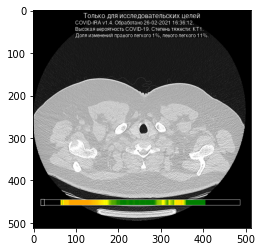

In [102]:
plt.imshow(dcm_rgb_jpeg.pixel_array)

In [103]:
dcm_rgb_jpeg.pixel_array.shape

(512, 512, 3)

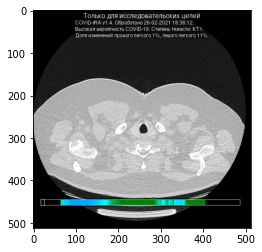

In [112]:
plt.imshow(dcm_rgb_jpeg.pixel_array[..., [2,1,0]])

In [ ]:
RGB
BGR